In [1]:
# A machine learning library used for linear regression
from sklearn.linear_model import LinearRegression
# numpy and pandas will be used for data manipulation
import numpy as np
import pandas as pd
# matplotlib will be used for visually representing our data
import matplotlib.pyplot as plt
# Quandl will be used for importing historical oil prices
import quandl

In [2]:
# Setting our API key
quandl.ApiConfig.api_key = 'LyKGxskqxx1ek2vFqte_'
# Importing our data
data = quandl.get("FRED/DCOILBRENTEU", start_date="2000-01-01", end_date="2020-01-01")

<AxesSubplot:xlabel='Date', ylabel='Crude Oil Prices: Brent - Europe'>

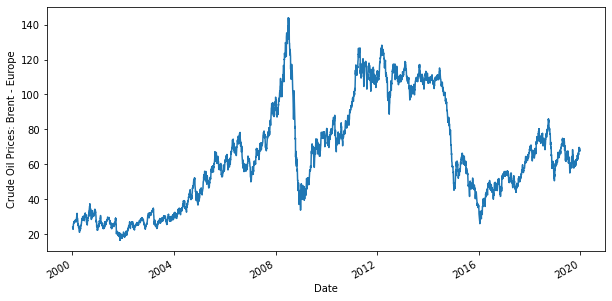

In [5]:
data.head()
# Setting the text on the Y-axis
plt.ylabel("Crude Oil Prices: Brent - Europe")

# Setting the size of our graph
data.Value.plot(figsize=(10,5))

In [6]:
data['MA3'] = data['Value'].shift(1).rolling(window=3).mean()
data['MA9']= data['Value'].shift(1).rolling(window=9).mean()
# Dropping the NaN values
data = data.dropna()
# Initialising X and assigning the two feature variables
X = data[['MA3','MA9']]
# Getting the head of the data
X.head()

,MA3,MA9
Date,,
2000-01-17,25.006667,24.032222
2000-01-18,25.463333,24.258889
2000-01-19,25.933333,24.546667
2000-01-20,26.156667,24.837778
2000-01-21,26.246667,25.161111


In [10]:
# Setting-up the dependent variable
y = data['Value']
# Getting the head of the data
y.head()
# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data))
# Training dataset
X_train = X[:t]
y_train = y[:t]
# Testing dataset
X_test = X[t:]
y_test = y[t:]

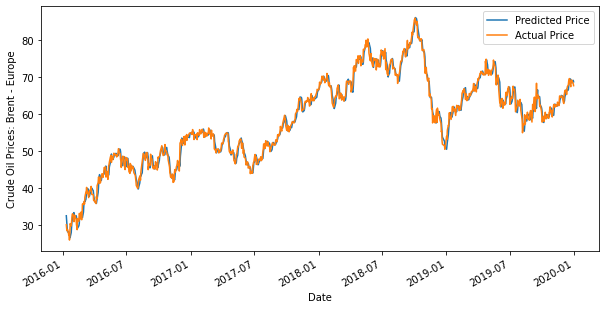

In [11]:
# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent - Europe")
plt.show()